<a href="https://colab.research.google.com/github/Al-Amin-01/LearnPytorch/blob/main/pytorchModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.1.0+cu118'

In [ ]:
weight=.7
bias=.4
start=0
end=1
step=.02

X=torch.arange(start,end,step)
y=weight*X+bias

In [ ]:
split=int(.8*len(X))
X_train,y_train=X[:split],y[:split]
X_test,y_test=X[split:],y[split:]
X_train,y_train,X_test,y_test

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.4000, 0.4140, 0.4280, 0.4420, 0.4560, 0.4700, 0.4840, 0.4980, 0.5120,
         0.5260, 0.5400, 0.5540, 0.5680, 0.5820, 0.5960, 0.6100, 0.6240, 0.6380,
         0.6520, 0.6660, 0.6800, 0.6940, 0.7080, 0.7220, 0.7360, 0.7500, 0.7640,
         0.7780, 0.7920, 0.8060, 0.8200, 0.8340, 0.8480, 0.8620, 0.8760, 0.8900,
         0.9040, 0.9180, 0.9320, 0.9460]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.9600, 0.9740, 0.9880, 1.0020, 1.0160, 1.0300, 1.0440, 1.0580, 1.0720,
         1.0860]))

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  def forward(self,x:torch.tensor)->torch.tensor:
    return self.weight*x+self.bias

In [ ]:
model_lr=LinearRegression()
model_lr,model_lr.state_dict()

(LinearRegression(),
 OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))]))

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(7,5))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(predictions,test_labels,c="r",s=4,label="Predictions data")

  plt.title("plot the training and testing data")
  plt.legend(prop={"size":12})

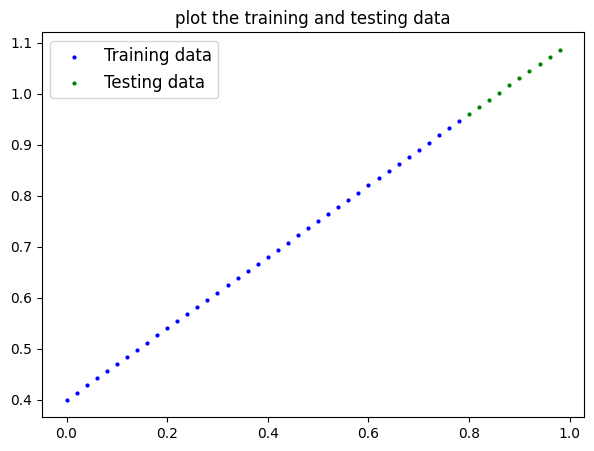

In [ ]:
plot_predictions()

In [ ]:
torch.manual_seed(42)
model_lr=LinearRegression()
model_lr,model_lr.state_dict()

(LinearRegression(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_lr.parameters(),lr=.01)

In [ ]:
epochs=200
epoch_count=[]
loss_val=[]
test_loss_val=[]
for epoch in range(epochs):
  model_lr.train()
  y_pred=model_lr(X_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_lr.eval()
  with torch.inference_mode():
    y_pred_test=model_lr(X_test)
    test_loss=loss_fn(y_pred_test,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_val.append(loss)
    test_loss_val.append(test_loss)


In [ ]:
with torch.inference_mode():
  y_preds=model_lr(X_test)

In [ ]:
y_preds

tensor([0.9475, 0.9613, 0.9751, 0.9889, 1.0027, 1.0165, 1.0303, 1.0441, 1.0579,
        1.0717])

In [ ]:
y_test

tensor([0.9600, 0.9740, 0.9880, 1.0020, 1.0160, 1.0300, 1.0440, 1.0580, 1.0720,
        1.0860])

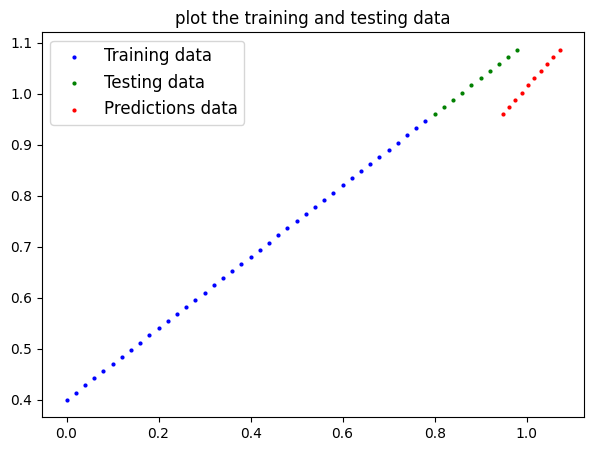

In [ ]:
plot_predictions(predictions=y_preds)

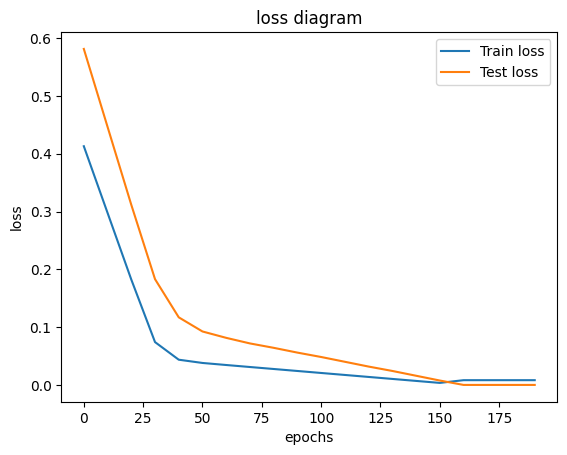

In [ ]:
plt.plot(epoch_count,torch.tensor(loss_val).numpy(),label="Train loss")
plt.plot(epoch_count,test_loss_val,label="Test loss")
plt.title("loss diagram")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [ ]:
model_lr.state_dict()

OrderedDict([('weight', tensor([0.6902])), ('bias', tensor([0.3953]))])

In [ ]:
weight,bias

(0.7, 0.4)

In [81]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="lrmodel.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_lr.state_dict(),
           f=MODEL_SAVE_PATH)

In [82]:
load_model=LinearRegression()
load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
load_model.state_dict()

OrderedDict([('weight', tensor([0.6902])), ('bias', tensor([0.3953]))])